In [0]:
from google.colab import drive
#drive.mount("/content/drive")

In [0]:
!unzip "drive/My Drive/deeplearning/covid.zip"

In [0]:
import os
def create_path(path) :
  if os.path.exists(path):
    print("Path already exist")
  else:
    os.mkdir(path)
    print("Created!")
data_dir = "data"
create_path(data_dir)

Created!


In [0]:
!mv train data

In [0]:
!ls data

test  train


In [0]:
!mv test data

In [0]:
!mv val data

In [0]:
test_dir = "data/test"
train_dir = "data/train"
val_dir = "data/val"

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_gen = ImageDataGenerator(rescale = 1./255)
val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)
val_generator = train_gen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)

Found 244 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [0]:
from tensorflow.keras import models, layers, optimizers

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [0]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = optimizers.RMSprop(),
    metrics = ['acc']
)

In [0]:
import pickle 
def save_data(model, history, iteration):
  model_file = storagepath + "covid19_model" + str(iteration).strip() + ".h5"
  historyfile = storagepath + "covid19_history" + str(iteration).strip() + ".pkle"
  model.save(model_file)
  with open(historyfile, "wb") as fp:
    pickle.dump(history.history, fp)
  return model, history
def load_data(iteration):
  model_file = storagepath + "covid19_model" + str(iteration).strip() + ".h5"
  historyfile = storagepath + "covid19_history" + str(iteration).strip() + ".pkle"
  model = models.load_model(model_file)
  with open(historyfile, "rb") as fp:
    history = pickle.load(fp)
  return model,  history

In [0]:
storagepath = "drive/My Drive/deeplearning/"

In [0]:
history = model.fit(
    train_generator,
    steps_per_epoch = 70,
    epochs = 30,
    validation_data = val_generator,
    validation_steps = 30
)

Epoch 1/30
70/70 [==============================] - 48s 681ms/step - loss: 0.4308 - acc: 0.8114 - val_loss: 0.2730 - val_acc: 0.9500
Epoch 2/30
70/70 [==============================] - 48s 686ms/step - loss: 0.2583 - acc: 0.9477 - val_loss: 0.0247 - val_acc: 1.0000
Epoch 3/30
70/70 [==============================] - 47s 677ms/step - loss: 0.0076 - acc: 0.9962 - val_loss: 0.6479 - val_acc: 0.9500
Epoch 4/30
70/70 [==============================] - 47s 675ms/step - loss: 9.0006e-06 - acc: 1.0000 - val_loss: 0.7922 - val_acc: 0.9500
Epoch 5/30
70/70 [==============================] - 48s 679ms/step - loss: 1.0560e-07 - acc: 1.0000 - val_loss: 0.6424 - val_acc: 0.9500
Epoch 6/30
70/70 [==============================] - 48s 680ms/step - loss: 0.1305 - acc: 0.9839 - val_loss: 0.4411 - val_acc: 0.9500
Epoch 7/30
70/70 [==============================] - 48s 685ms/step - loss: 0.0059 - acc: 0.9970 - val_loss: 0.0738 - val_acc: 0.9500
Epoch 8/30
70/70 [==============================] - 48s 681ms

In [0]:
model_file, historyfile = save_data(model, history, 1)
print(model_file, historyfile, "saved!")

<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f56fb633080> <tensorflow.python.keras.callbacks.History object at 0x7f56fb097518> saved!


In [0]:
model, history = load_data(1)

In [0]:
history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [0]:
epochs = range(1, len(history['acc']) + 1 )
loss = history['loss']
acc = history['acc']
val_loss = history['val_loss']
val_acc = history['val_acc']

In [0]:
import matplotlib.pyplot as plt

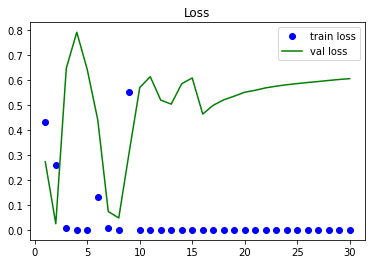

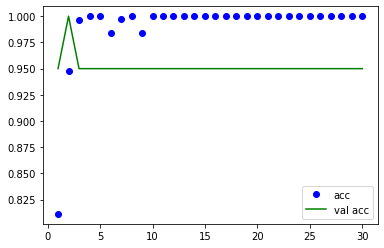

In [0]:
plt.plot(epochs, loss, "bo", label = "train loss")
plt.plot(epochs, val_loss, "g", label = "val loss")
plt.title("Loss")
plt.legend()
plt.figure()
plt.plot(epochs, acc, "bo", label = "acc")
plt.plot(epochs, val_acc, "g", label = "val acc")
plt.legend()
plt.show()

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator  = test_datagen.flow_from_directory(
    test_dir,
    batch_size = 20,
    target_size = (150,150),
    class_mode = "binary"
)

Found 20 images belonging to 2 classes.


In [0]:
model.evaluate(test_generator, steps = 70)

70/70 [==============================] - 26s 371ms/step - loss: 4.5848e-11 - acc: 1.0000


[4.584849513933342e-11, 1.0]

In [0]:
load_data(1)

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7f56d4125748>,
 {'acc': [0.8113636374473572,
   0.9477272629737854,
   0.9961656332015991,
   1.0,
   1.0,
   0.9838957190513611,
   0.9969696998596191,
   1.0,
   0.9840909242630005,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'loss': [0.43079206347465515,
   0.2583144009113312,
   0.007596895564347506,
   9.000556929095183e-06,
   1.0560032848161427e-07,
   0.1304715871810913,
   0.005854523275047541,
   5.226884695730405e-06,
   0.5517725944519043,
   1.7232956452062353e-05,
   3.1596471217198996e-07,
   1.0241615555628414e-08,
   3.102778034502762e-10,
   9.121203792261667e-11,
   1.3476769700204727e-10,
   1.8625875841671302e-10,
   2.3875530025252445e-11,
   2.4992485511687867e-11,
   2.4064684273072956e-11,
   4.318688115456659e-11,
   4.022917068913223e-11,
   5.1010681789698253e-11,
   7.50829

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(
    loss = "binary_crossentropy",
    optimizer = optimizers.RMSprop(),
    metrics = ['acc']
)

In [0]:
train_gen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    shear_range = 0.2,
    rotation_range = 40,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = "nearest"

    )
val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 10,
    class_mode = "binary"
)
val_generator = train_gen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 10,
    class_mode = "binary"
)

Found 244 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [0]:
history = model.fit(
    train_generator,
    steps_per_epoch = 20,
    epochs = 100,
    validation_data = val_generator,
    validation_steps = 30
)
model_file, historyfile = save_data(model, history, 2)
print(model_file, historyfile, "saved!")

Epoch 1/100
20/20 [==============================] - 14s 679ms/step - loss: 0.9878 - acc: 0.5250 - val_loss: 0.6724 - val_acc: 0.9667
Epoch 2/100
20/20 [==============================] - 14s 686ms/step - loss: 0.6932 - acc: 0.6237 - val_loss: 0.6776 - val_acc: 0.5000
Epoch 3/100
20/20 [==============================] - 14s 709ms/step - loss: 0.6931 - acc: 0.6186 - val_loss: 0.5641 - val_acc: 0.7067
Epoch 4/100
20/20 [==============================] - 14s 681ms/step - loss: 0.6732 - acc: 0.6340 - val_loss: 0.8183 - val_acc: 0.5800
Epoch 5/100
20/20 [==============================] - 14s 681ms/step - loss: 0.5918 - acc: 0.7423 - val_loss: 0.7711 - val_acc: 0.6400
Epoch 6/100
20/20 [==============================] - 13s 673ms/step - loss: 0.5530 - acc: 0.7950 - val_loss: 3.3760 - val_acc: 0.4933
Epoch 7/100
20/20 [==============================] - 15s 728ms/step - loss: 0.6680 - acc: 0.7629 - val_loss: 0.5945 - val_acc: 0.6467
Epoch 8/100
20/20 [==============================] - 13s 673ms

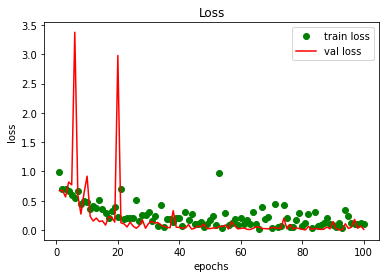

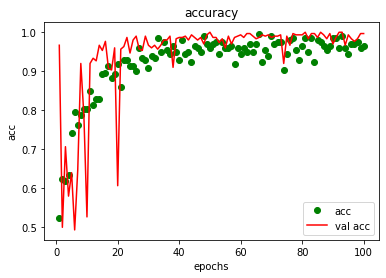

In [0]:
history = history.history
epochs = range(1, len(history['acc']) + 1 )
loss = history['loss']
acc = history['acc']
val_loss = history['val_loss']
val_acc = history['val_acc']
plt.plot(epochs, loss, "go", label = "train loss")
plt.plot(epochs, val_loss, "r", label = "val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.figure()
plt.plot(epochs, acc, "go", label = "acc")
plt.plot(epochs, val_acc, "r", label = "val acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.title("accuracy")
plt.legend()
plt.show()

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator  = test_datagen.flow_from_directory(
    test_dir,
    batch_size = 10,
    target_size = (150,150),
    class_mode = "binary"
)
model.evaluate(test_generator, steps = 70)

Found 20 images belonging to 2 classes.
70/70 [==============================] - 14s 195ms/step - loss: 0.0036 - acc: 1.0000


[0.003603807184845209, 1.0]

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(
    loss = "binary_crossentropy",
    optimizer = optimizers.RMSprop(),
    metrics = ['acc']
)
history = model.fit(
    train_generator,
    steps_per_epoch = 20,
    epochs = 99,
    validation_data = val_generator,
    validation_steps = 30
)
model_file, historyfile = save_data(model, history, 3)
print(model_file, historyfile, "saved!")

Epoch 1/99
20/20 [==============================] - 14s 685ms/step - loss: 2.0070 - acc: 0.5800 - val_loss: 0.6661 - val_acc: 0.5000
Epoch 2/99
20/20 [==============================] - 15s 754ms/step - loss: 0.6282 - acc: 0.6753 - val_loss: 0.5257 - val_acc: 0.7200
Epoch 3/99
20/20 [==============================] - 14s 693ms/step - loss: 0.6624 - acc: 0.7216 - val_loss: 0.5020 - val_acc: 0.8967
Epoch 4/99
20/20 [==============================] - 14s 694ms/step - loss: 0.5496 - acc: 0.7784 - val_loss: 0.4793 - val_acc: 0.9433
Epoch 5/99
20/20 [==============================] - 14s 712ms/step - loss: 0.6076 - acc: 0.7784 - val_loss: 0.3007 - val_acc: 0.9267
Epoch 6/99
20/20 [==============================] - 14s 717ms/step - loss: 0.5408 - acc: 0.7700 - val_loss: 0.4235 - val_acc: 0.9100
Epoch 7/99
20/20 [==============================] - 14s 700ms/step - loss: 0.5166 - acc: 0.7732 - val_loss: 0.3702 - val_acc: 0.8433
Epoch 8/99
20/20 [==============================] - 14s 725ms/step - 

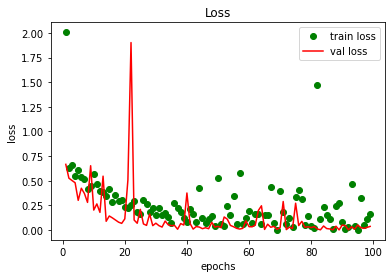

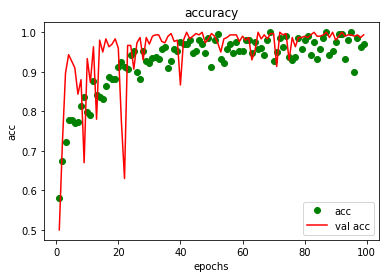

In [0]:
history = history.history
epochs = range(1, len(history['acc']) + 1 )
loss = history['loss']
acc = history['acc']
val_loss = history['val_loss']
val_acc = history['val_acc']
plt.plot(epochs, loss, "go", label = "train loss")
plt.plot(epochs, val_loss, "r", label = "val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.figure()
plt.plot(epochs, acc, "go", label = "acc")
plt.plot(epochs, val_acc, "r", label = "val acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.title("accuracy")
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(
    loss = "binary_crossentropy",
    optimizer = optimizers.RMSprop(),
    metrics = ['acc']
)
history = model.fit(
    train_generator,
    steps_per_epoch = 20,
    epochs = 300,
    validation_data = val_generator,
    validation_steps = 30
)
model_file, historyfile = save_data(model, history, 4)
print(model_file, historyfile, "saved!")

Epoch 1/300
20/20 [==============================] - 22s 1s/step - loss: 0.9031 - acc: 0.5807 - val_loss: 0.5072 - val_acc: 0.9000
Epoch 2/300
20/20 [==============================] - 22s 1s/step - loss: 0.3517 - acc: 0.8886 - val_loss: 0.0854 - val_acc: 0.9500
Epoch 3/300
20/20 [==============================] - 23s 1s/step - loss: 0.5461 - acc: 0.8802 - val_loss: 0.1697 - val_acc: 0.9500
Epoch 4/300
20/20 [==============================] - 22s 1s/step - loss: 0.1444 - acc: 0.9538 - val_loss: 0.2003 - val_acc: 0.9500
Epoch 5/300
20/20 [==============================] - 22s 1s/step - loss: 0.1126 - acc: 0.9583 - val_loss: 0.1512 - val_acc: 0.9500
Epoch 6/300
20/20 [==============================] - 22s 1s/step - loss: 0.2742 - acc: 0.9429 - val_loss: 0.1510 - val_acc: 0.9500
Epoch 7/300
20/20 [==============================] - 22s 1s/step - loss: 0.0801 - acc: 0.9792 - val_loss: 0.3013 - val_acc: 0.9500
Epoch 8/300
20/20 [==============================] - 22s 1s/step - loss: 0.0071 - a

In [0]:
history = history.history
epochs = range(1, len(history['acc']) + 1 )
loss = history['loss']
acc = history['acc']
val_loss = history['val_loss']
val_acc = history['val_acc']
plt.plot(epochs, loss, "go", label = "train loss")
plt.plot(epochs, val_loss, "r", label = "val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.figure()
plt.plot(epochs, acc, "go", label = "acc")
plt.plot(epochs, val_acc, "r", label = "val acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.title("accuracy")
plt.legend()
plt.show()

In [0]:
model, history = load_data(3)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator  = test_datagen.flow_from_directory(
    test_dir,
    batch_size = 10,
    target_size = (150,150),
    class_mode = "binary"
)
model.evaluate(test_generator, steps = 15)

In [0]:
!unzip "drive/My Drive/deeplearning/pred.zip"

In [0]:
!mv pred data
!ls data

In [0]:
pred_dir = "data/pred"

In [0]:
labels = {0 : "corona", 1 : "normal"}

In [0]:
pred_datagen = ImageDataGenerator(rescale = 1./255)

pred_generator = pred_datagen.flow_from_directory(
    pred_dir,
    target_size = (150,150),
    batch_size = 1,
    class_mode = "binary"
)

In [0]:
prediction = model.predict(pred_generator, verbose = 1, steps = 10)

In [0]:
import numpy as np
pred = []
for i in range(len(prediction)):
  pred.append((np.argmax(prediction[i])))

In [0]:
for j in pred:
  print(f"predicted :{labels[j]}")